In [49]:
## Lending club case study
## import required libraries initially
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [50]:
## Import the previous loan data
loan_data =pd.read_csv("C:\\Users\\vbelsare\\Downloads\\ML course\\3. Lending Club Case Study\\loan\\loan.csv", sep=',', dtype='unicode')

In [51]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [52]:
loan_data.shape

(39717, 111)

In [53]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [54]:
## Check if data has missing values
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [55]:
## Drop all columns having 100% missing data - All values NAN
tmp=loan_data.isnull().sum()==loan_data.shape[0]
NaN_Cols_df = tmp.to_frame()
NaN_Cols_df = NaN_Cols_df[NaN_Cols_df[0]==True]
col_list = NaN_Cols_df.index.tolist() # listall columns in list
loan_data_wo_na = loan_data.drop(columns=col_list) # drop all columns from lis
loan_data_wo_na.shape

(39717, 57)

In [57]:
## Drop all columns having 70% or more data missing
threshold = 70
tmp=(loan_data.isnull().sum()/loan_data.shape[0] * 100) > threshold
NaN_Cols_df = tmp.to_frame()
NaN_Cols_df = NaN_Cols_df[NaN_Cols_df[0]==True]
col_list = NaN_Cols_df.index.tolist() # listall columns in list
loan_data = loan_data.drop(columns=col_list) # drop all columns from lis
loan_data.shape

(39717, 55)

In [58]:
## Drop all columns having only 1 unique value
unique_values_cols = loan_data.nunique()
columns_with_only_one_value = unique_values_cols[unique_values_cols.values == 1]
loan_data.drop(columns = list(columns_with_only_one_value.index), inplace=True)
loan_data.shape

(39717, 46)

In [59]:
cols = loan_data.columns
cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [62]:
## Customer Behaviour variables that are created after a loan is taken doesn't make sense for our analysis. 
## Also, fields like id, member_id & url are not needed as we are doing overall analysis.
## zip_code values are masked so not useful anymore.
## desc have excessive len which can't be analysed
## columns like loan_amnt, funded_amnt, funded_amnt_inv have high correlation value and
## are similar fields. So, keeping just loan_amnt
## Therefore, we will drop all these columns mentioned below:

drop_irrelevant_cols = ["delinq_2yrs","earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", 
                        "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv", "mths_since_last_delinq", "pub_rec_bankruptcies", "emp_title",
                        "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee", "funded_amnt", "funded_amnt_inv",
                        "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d", "id", "desc", "title", "member_id","url","zip_code",]
loan_data.drop(columns=drop_irrelevant_cols, inplace=True)
loan_data.shape

(39717, 15)

In [63]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti'],
      dtype='object')

In [64]:
## Keeping useful columns
##relevant_cols = ["issue_d","loan_amnt", "term", "int_rate", "grade", "sub_grade", "annual_inc", "purpose", "dti", "emp_length", "home_ownership", "verification_status", "installment", "addr_state", "loan_status"]
relevant_cols = loan_data.columns
final_loan_data = loan_data_wo_na[relevant_cols].copy()
final_loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,GA,1
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,other,CA,20
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000,Source Verified,Dec-11,Current,other,OR,17.94


In [65]:
## Drop all rows having loan status as current as we can't make any decision based on it.
final_loan_data = final_loan_data[final_loan_data.loan_status!='Current'].reset_index(drop=True)
final_loan_data.shape

(38577, 15)

In [66]:
### Data Cleaning - missing values fill 
final_loan_data.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

In [67]:
##Assumption - We take employment length as a categorical variable. We calculate the mode of it 
##and replace all the missing values with it. 

emp_len_mode = final_loan_data.emp_length.mode()
emp_len_mode[0]

'10+ years'

In [68]:
final_loan_data['emp_length'].fillna(final_loan_data['emp_length'].mode()[0],inplace=True)
final_loan_data.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [70]:
## Data formatting 
## Remove percentage from interest rate and convert to float

final_loan_data['int_rate'] = final_loan_data['int_rate'].str.replace('%', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [71]:
final_loan_data['loan_amnt'] = final_loan_data['loan_amnt'].astype(int)
final_loan_data['annual_inc'] = final_loan_data['annual_inc'].astype(float)
final_loan_data['installment'] = final_loan_data['installment'].astype(float)
final_loan_data['dti'] = final_loan_data['dti'].astype(float)
final_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int32  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  float64
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   emp_length           38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   annual_inc           38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  addr_state           38577 non-null  object 
 14  dti                  38577 non-null  float64
dtypes: float64(4), int32(1), object(10)


In [72]:
## issue date format into month and year
final_loan_data["issue_d_month"] = final_loan_data["issue_d"].apply(lambda x: x.split("-")[0])
final_loan_data["issue_d_year"] = final_loan_data["issue_d"].apply(lambda x: "20"+x.split("-")[1])

## we drop the original issue date
final_loan_data.drop(columns=['issue_d'], inplace=True) 

In [77]:
### We have cleaned the data. Now we will try and understand the data with some charts/graphs
### Distribution of data 
final_loan_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,11.932219,322.466318,6.877797e+04,13.272727
std,7348.441646,3.691327,208.639215,6.421868e+04,6.673044
min,500.000000,5.420000,15.690000,4.000000e+03,0.000000
25%,5300.000000,8.940000,165.740000,4.000000e+04,8.130000
50%,9600.000000,11.710000,277.860000,5.886800e+04,13.370000
75%,15000.000000,14.380000,425.550000,8.200000e+04,18.560000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


In [78]:
categorical_cols = ['term', 'grade', 'sub_grade',
       'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state',
       'issue_d_month', 'issue_d_year', 'loan_status']
continuous_cols = ['loan_amnt','int_rate','annual_inc','dti', 'installment']

------------- term --------------


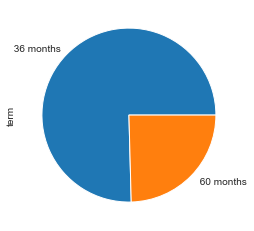

------------- grade --------------


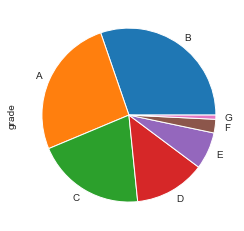

------------- sub_grade --------------


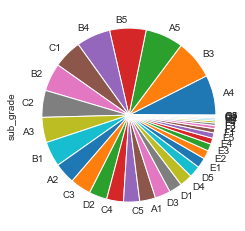

------------- emp_length --------------


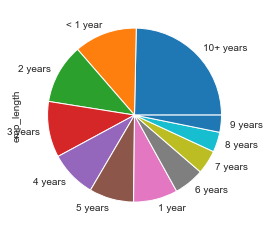

------------- home_ownership --------------


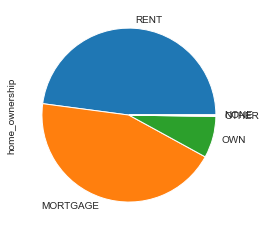

------------- verification_status --------------


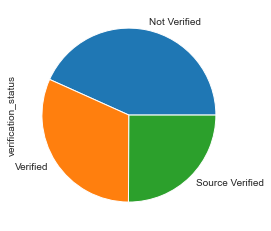

------------- purpose --------------


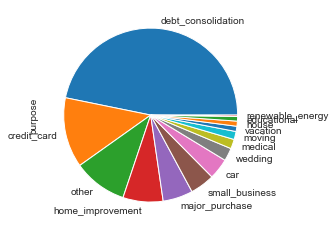

------------- addr_state --------------


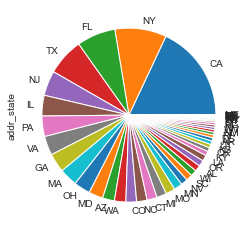

------------- issue_d_month --------------


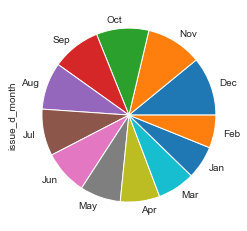

------------- issue_d_year --------------


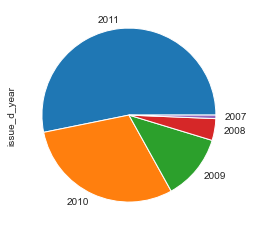

------------- loan_status --------------


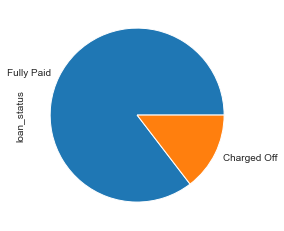

In [79]:
for col_name in categorical_cols:
        print("-------------", col_name, "--------------")
        (final_loan_data[col_name].value_counts(1)*100).plot(kind='pie')
        plt.show()

------------- term --------------


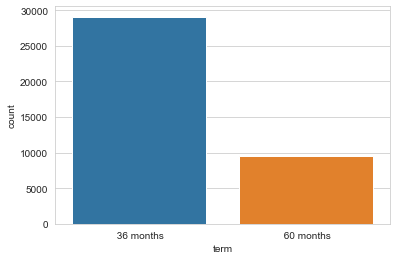

------------- grade --------------


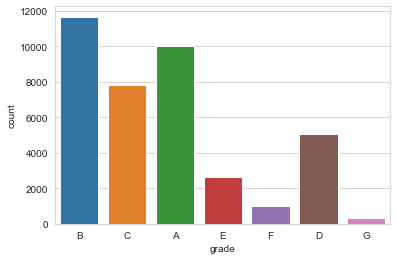

------------- sub_grade --------------


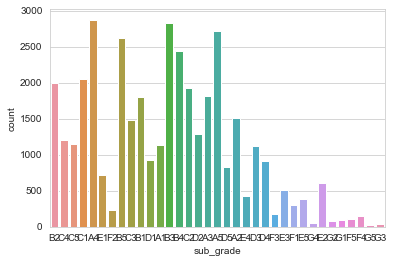

------------- emp_length --------------


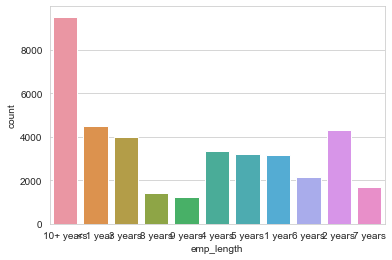

------------- home_ownership --------------


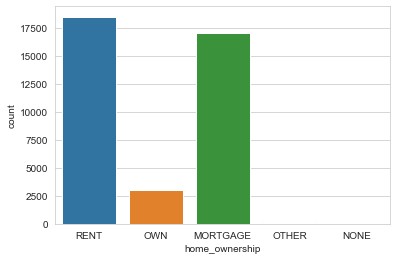

------------- verification_status --------------


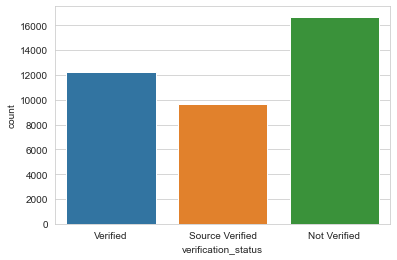

------------- purpose --------------


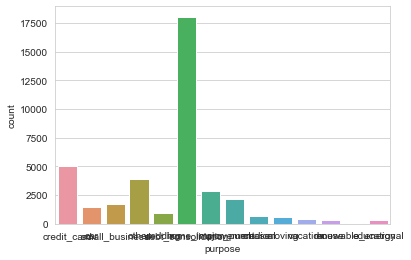

------------- addr_state --------------


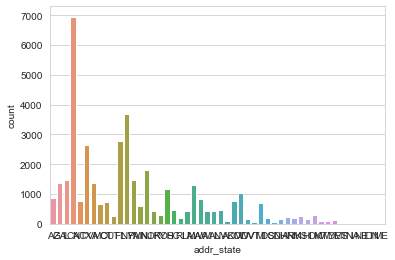

------------- issue_d_month --------------


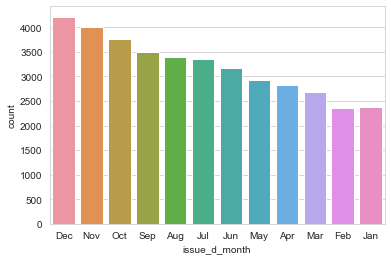

------------- issue_d_year --------------


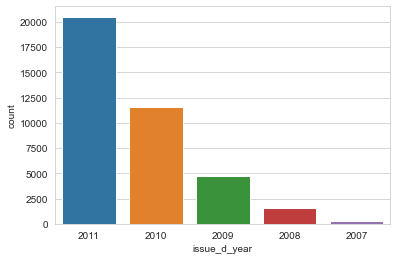

------------- loan_status --------------


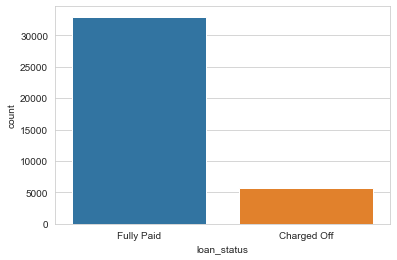

In [80]:
for col_name in categorical_cols:
    print("-------------", col_name, "--------------")
    sns.countplot(final_loan_data[col_name])
    plt.show()

------------- loan_amnt --------------


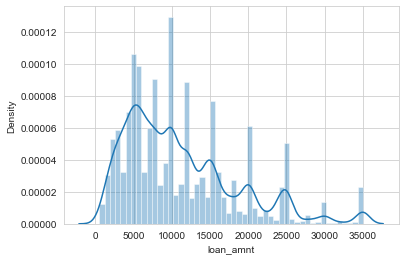

------------- int_rate --------------


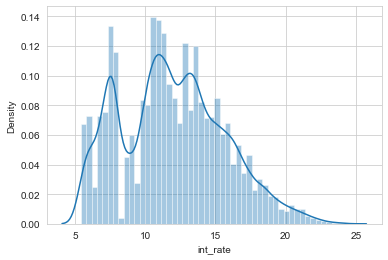

------------- annual_inc --------------


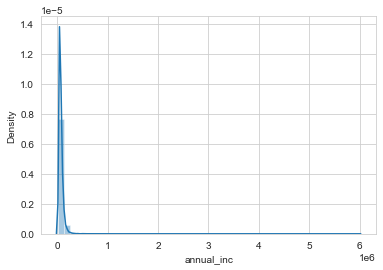

------------- dti --------------


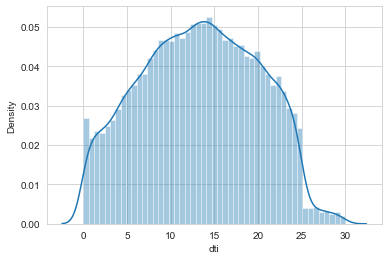

------------- installment --------------


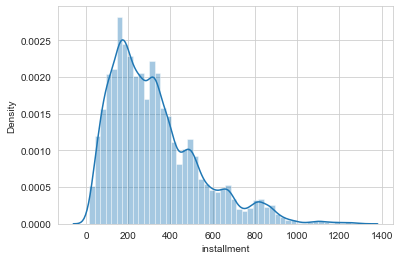

In [81]:
for col_name in continuous_cols:
    print("-------------", col_name, "--------------")
    sns.distplot(final_loan_data[col_name])
    plt.show()

------------- term --------------


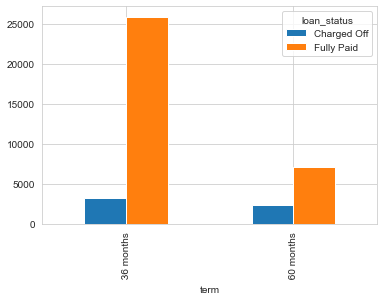

------------- grade --------------


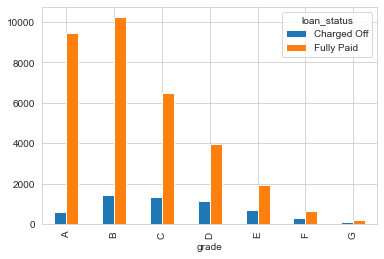

------------- sub_grade --------------


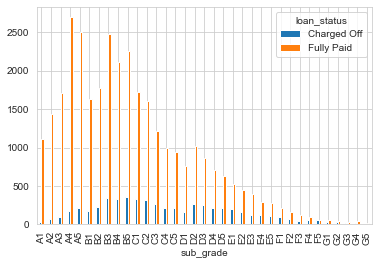

------------- emp_length --------------


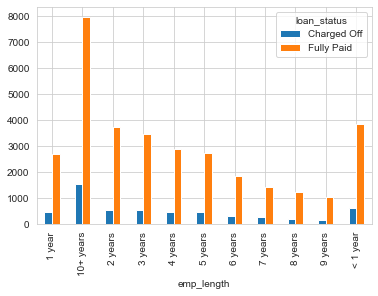

------------- home_ownership --------------


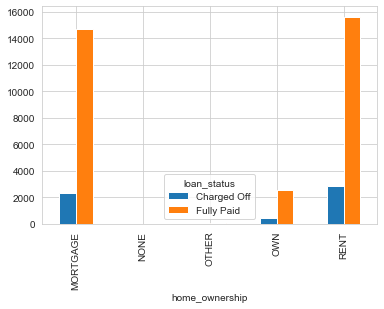

------------- verification_status --------------


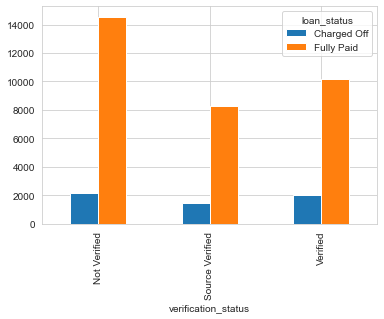

------------- purpose --------------


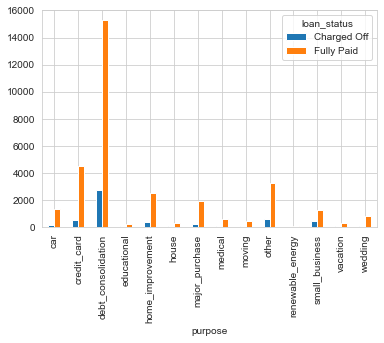

------------- addr_state --------------


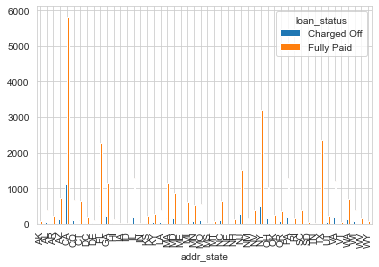

------------- issue_d_month --------------


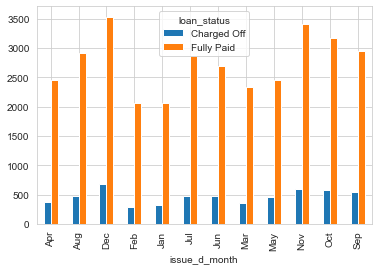

------------- issue_d_year --------------


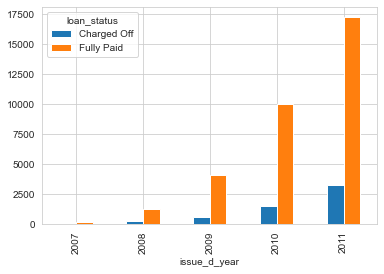

------------- loan_status --------------


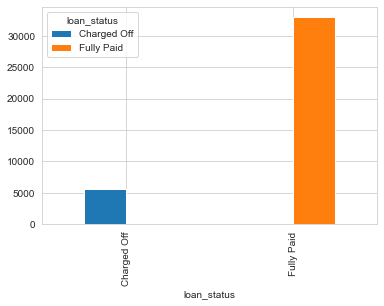

In [82]:
### Univariate Analysis:
## Categorical Variables
for i in categorical_cols:
    print("-------------", i, "--------------")
    final_loan_data.groupby(i)['loan_status'].value_counts().unstack().plot(kind='bar',stacked=False)
    plt.show()

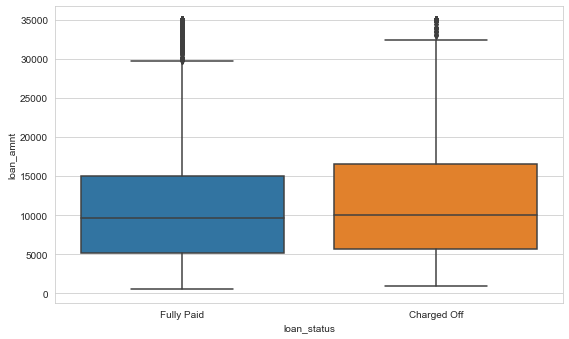

In [83]:
## Continuous variobles
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = final_loan_data)
plt.show()

In [84]:
final_loan_data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [85]:
## since we see there is significant difference between mean and median . let us limit our data to 75%
loan_till75 = final_loan_data.loc[(final_loan_data['loan_amnt']<=15000)]

In [87]:
loan_above75 = final_loan_data.loc[(final_loan_data['loan_amnt']>=15000)]
loan_above75.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year
19,20250,60 months,15.27,484.63,C,C4,3 years,RENT,43370.0,Verified,Fully Paid,debt_consolidation,TX,26.53,Dec,2011
20,21000,36 months,12.42,701.73,B,B4,10+ years,RENT,105000.0,Verified,Charged Off,debt_consolidation,FL,13.22,Dec,2011
24,15000,36 months,9.91,483.38,B,B1,2 years,MORTGAGE,92000.0,Verified,Fully Paid,credit_card,IL,29.44,Dec,2011
25,15000,36 months,14.27,514.64,C,C2,9 years,RENT,60000.0,Not Verified,Charged Off,debt_consolidation,NY,15.22,Dec,2011
30,31825,36 months,7.90,995.82,A,A4,5 years,MORTGAGE,75000.0,Verified,Fully Paid,debt_consolidation,NJ,14.03,Dec,2011


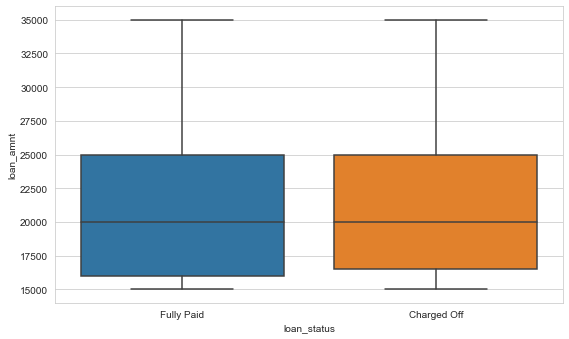

In [88]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

------------- loan_amnt --------------


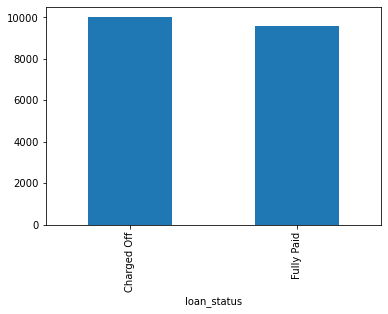

------------- int_rate --------------


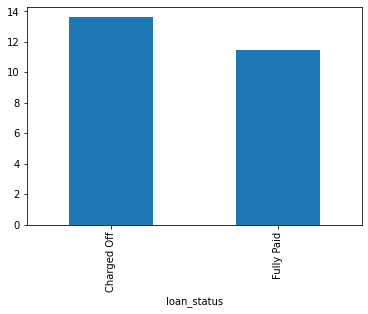

------------- annual_inc --------------


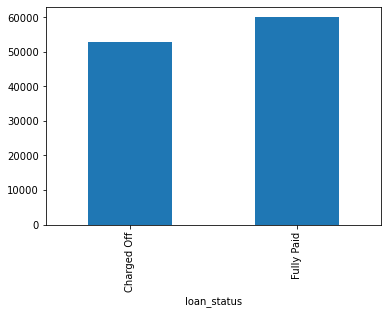

------------- dti --------------


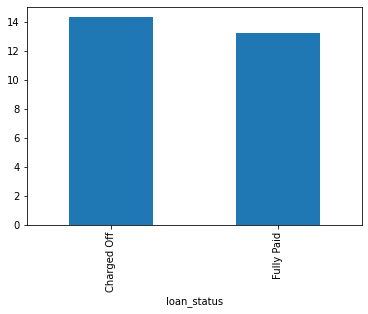

------------- installment --------------


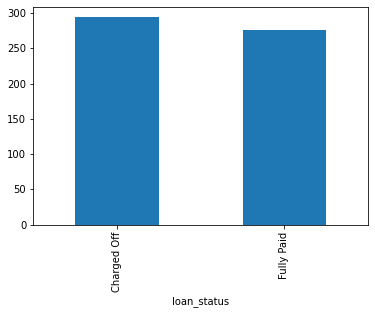

In [38]:
## TODO: Fix this plot - need to create bins and median in that
for col_name in continuous_cols:
    print("-------------", col_name, "--------------")
    final_loan_data.groupby('loan_status')[col_name].median().plot(kind='bar',stacked=False)
    plt.show()

In [89]:
## Bivariate Analysis
final_loan_data['loan_status_num'] = final_loan_data['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)
final_loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year,loan_status_num
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,Dec,2011,1
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,Dec,2011,0
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,Dec,2011,1
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,Dec,2011,1
4,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,Dec,2011,1


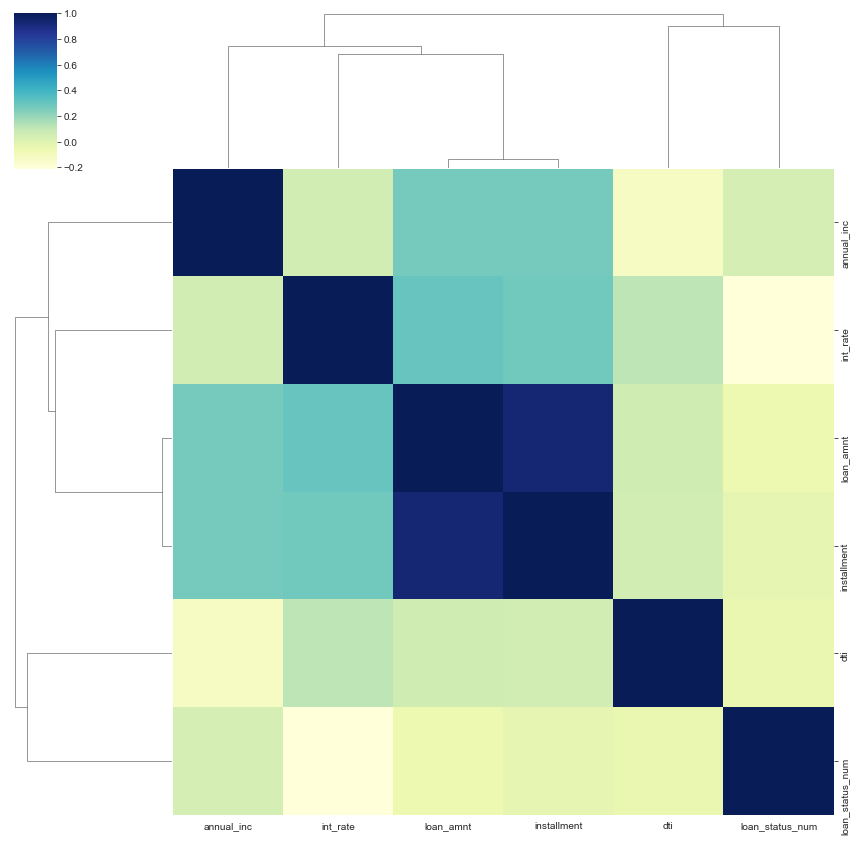

In [90]:
sns.set_style("whitegrid")
sns.clustermap(data=final_loan_data.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()